## Project Title : Epileptic Seizure Identification using Machine Learning

### Introduction
Welcome to the project! In this project, we aim to develop a Machine-Learning Framework for Epileptic Seizure Identification using Bangalore EEG Data

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
dataset = pd.read_csv(r"C:\Users\VISHAL\Desktop\ml_stuff\college\Projects\EEG Detection\dataset\BEED_Data.csv")

## Performing Exploratory Data Analysis (EDA)

In [3]:
# 5 samples of the dataset
dataset.sample(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
6889,7,-1,5,0,-17,16,6,7,3,6,5,-7,-2,9,-3,1,3
6185,-2,1,10,7,-6,9,2,11,-3,10,2,2,2,9,-1,1,3
7440,-9,25,4,4,-12,17,6,12,-22,13,11,13,-29,6,21,16,3
3927,-4,-4,-17,4,-8,-3,-13,4,7,-7,-21,13,-9,-5,1,5,1
1623,-111,-83,-43,6,47,74,74,59,23,-33,-80,-128,-158,-173,-162,-144,0


In [4]:
# shape of the dataset
dataset.shape

(8000, 17)

In [5]:
# info about the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8000 non-null   int64
 1   X2      8000 non-null   int64
 2   X3      8000 non-null   int64
 3   X4      8000 non-null   int64
 4   X5      8000 non-null   int64
 5   X6      8000 non-null   int64
 6   X7      8000 non-null   int64
 7   X8      8000 non-null   int64
 8   X9      8000 non-null   int64
 9   X10     8000 non-null   int64
 10  X11     8000 non-null   int64
 11  X12     8000 non-null   int64
 12  X13     8000 non-null   int64
 13  X14     8000 non-null   int64
 14  X15     8000 non-null   int64
 15  X16     8000 non-null   int64
 16  y       8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB


In [6]:
# descriptive stats of the numerical features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,8000.0,-1.490375,36.824213,-281.0,-7.00,0.0,8.00,252.0
X2,8000.0,-2.189375,36.108088,-255.0,-7.00,0.0,8.00,261.0
X3,8000.0,-3.237500,35.802490,-255.0,-7.00,-1.0,5.00,238.0
X4,8000.0,-4.119375,36.285268,-257.0,-10.00,-1.0,7.00,246.0
X5,8000.0,-1.821625,37.621284,-264.0,-10.00,0.0,10.00,249.0
X6,8000.0,-2.311750,36.306006,-277.0,-8.00,0.0,8.00,245.0
X7,8000.0,-3.398125,36.358395,-277.0,-8.00,-1.0,6.00,220.0
X8,8000.0,-3.448625,36.522214,-260.0,-7.00,-1.0,5.00,271.0
X9,8000.0,-1.647875,38.107721,-290.0,-7.00,0.0,8.00,280.0
X10,8000.0,-2.561250,37.540680,-302.0,-8.00,0.0,8.00,251.0


In [7]:
# check for duplicate records
dataset.duplicated().sum()

np.int64(0)

In [8]:
# check for null values
dataset.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

In [9]:
# check for number of unique values a feature have
dataset.nunique()

X1     333
X2     348
X3     339
X4     345
X5     340
X6     340
X7     350
X8     350
X9     352
X10    351
X11    343
X12    343
X13    341
X14    335
X15    342
X16    340
y        4
dtype: int64

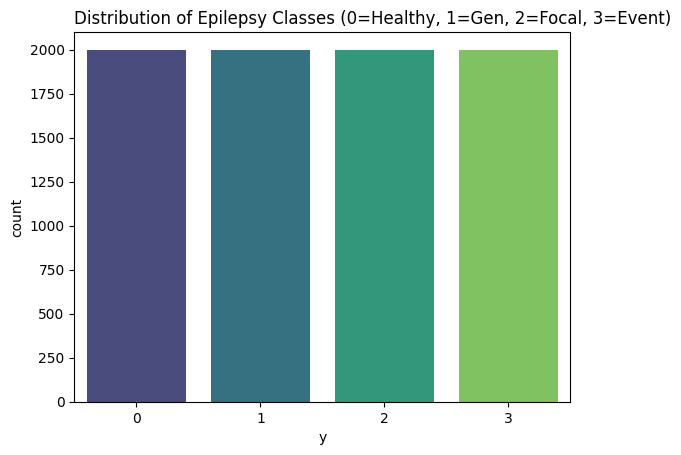

In [32]:
plt.title(label="Distribution of Epilepsy Classes (0=Healthy, 1=Gen, 2=Focal, 3=Event)", loc='left')
sns.countplot(data = dataset, x='y', palette='viridis')
plt.show()

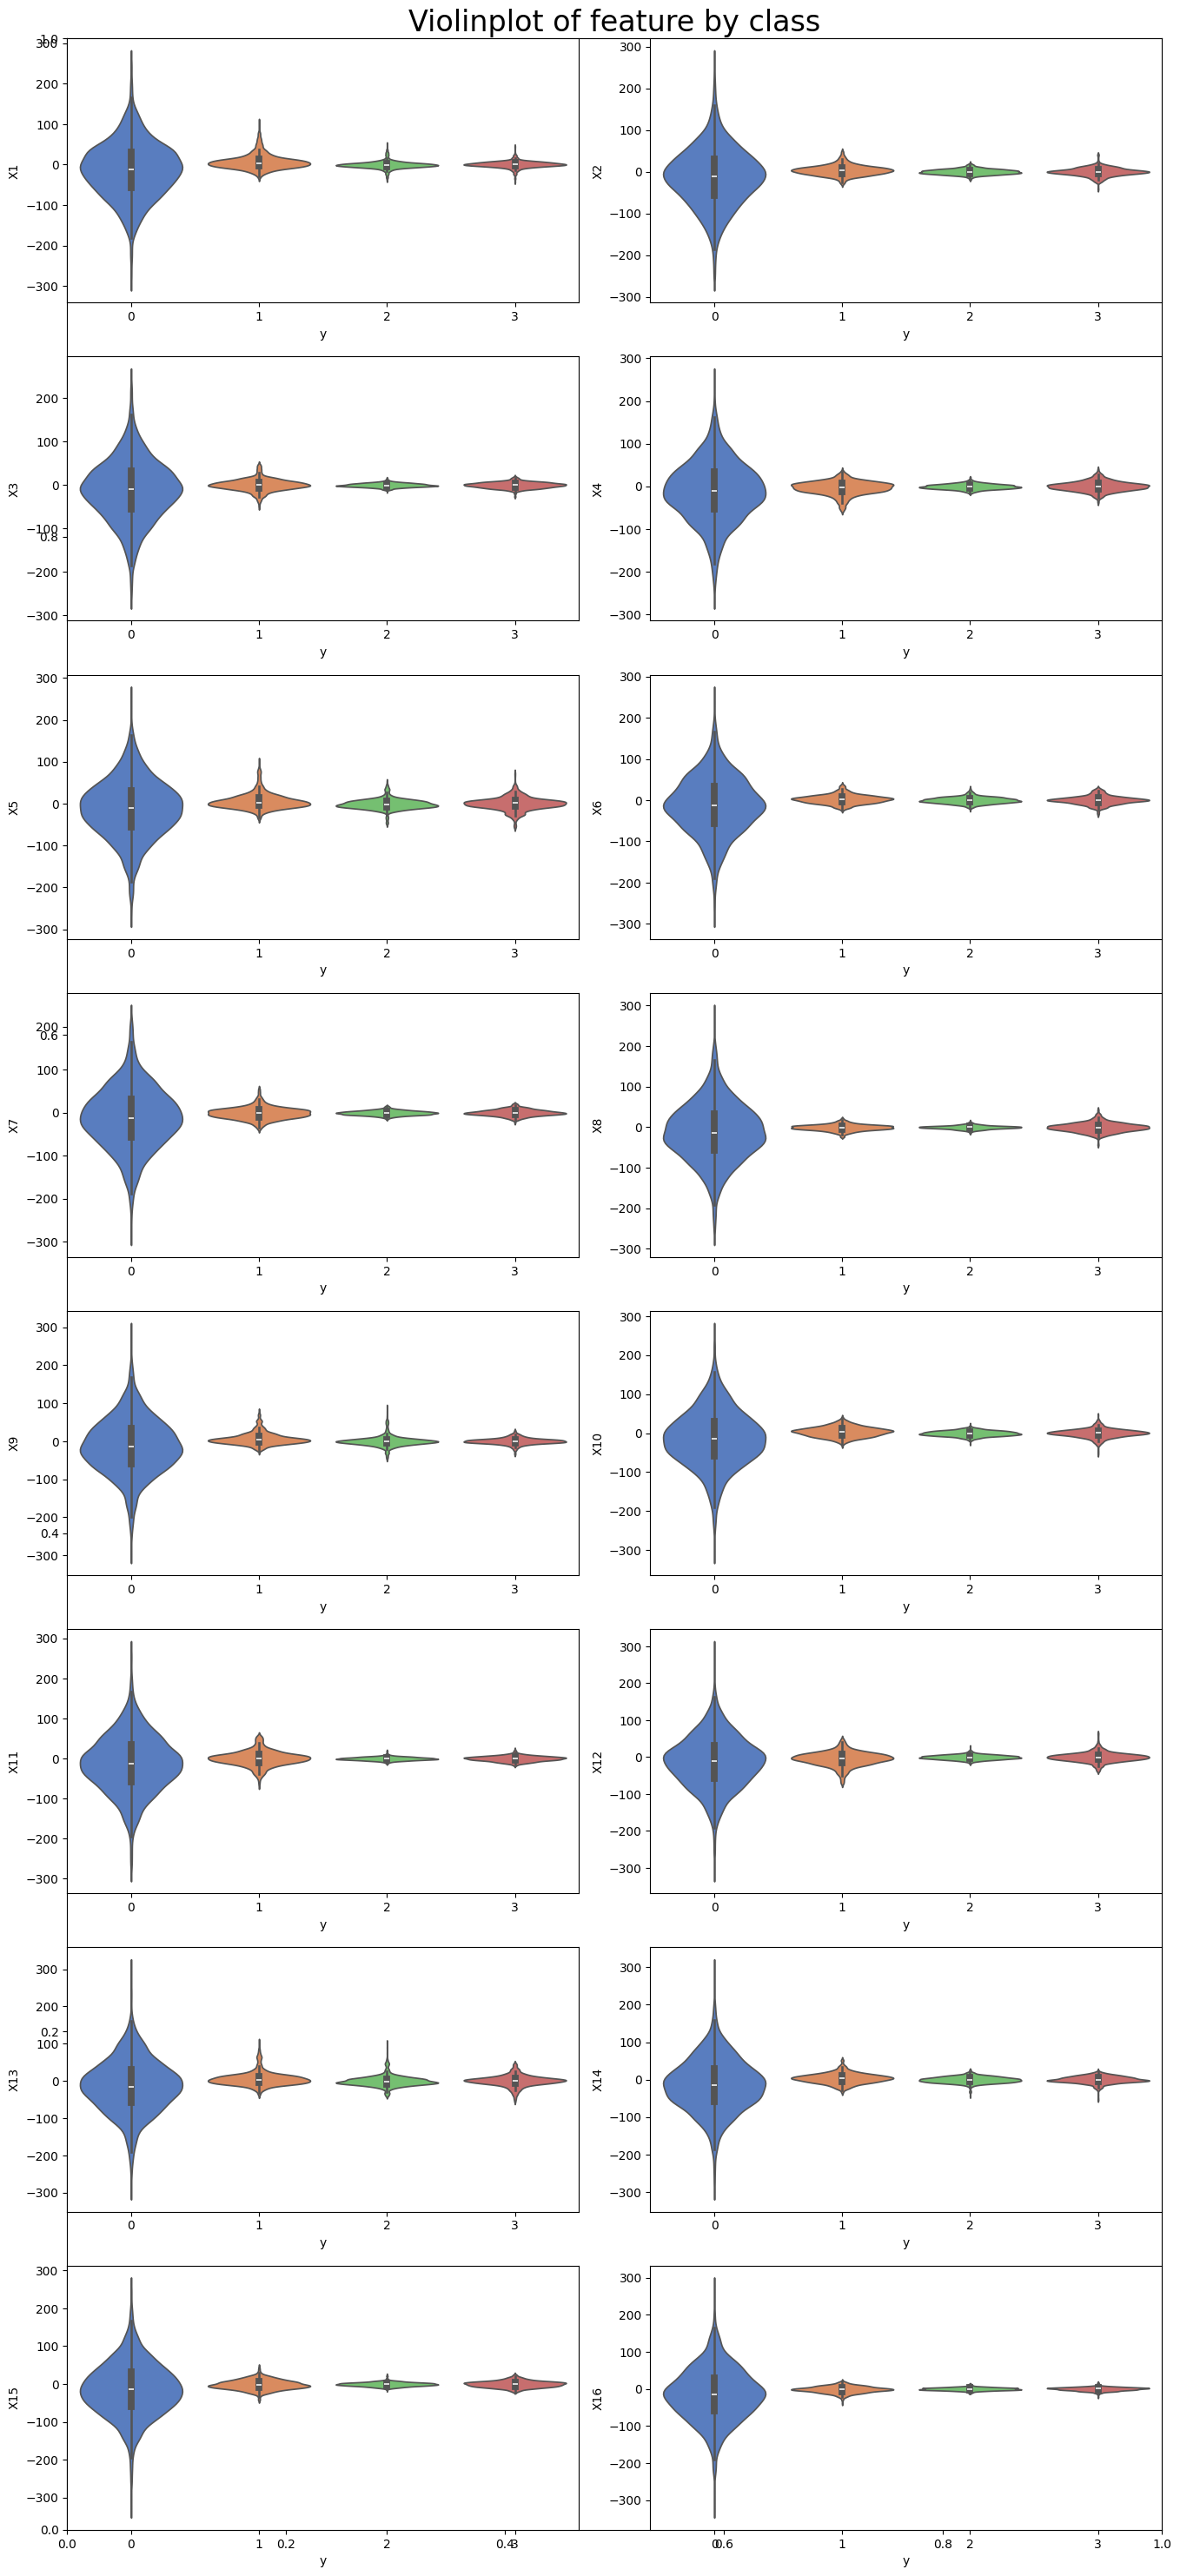

In [47]:
columns = dataset.columns.drop('y')
loc=1

plt.figure(figsize=(14,30))
plt.title(label='Violinplot of feature by class', fontsize=24)
for col in columns:
    plt.subplot(8,2,loc)
    sns.violinplot(data=dataset, y=col, x='y', palette='muted')
    loc +=1
plt.tight_layout()
plt.show()

#### Inference
1. Blue violin, Class 0 (Healthy) : It looks wide, meaning that the values for the healthy patients have a very high variance (a huge spread).
2. Seizure Classes (1, 2, 3) are almost Similar: These violins are all very tight and narrow, clustered around 0. This means that during any seizure event (class 1,2,3), the values becomes stable and shows a very low varience.
3. Using the high varience property of class 0, we can easily distinguish the healthy patient.
4. For identification of classes (1,2,3), varience property do not provide any input. Their distributions look nearly identical.

In [64]:
# correlation matrix
corr_matrix = dataset.corr()

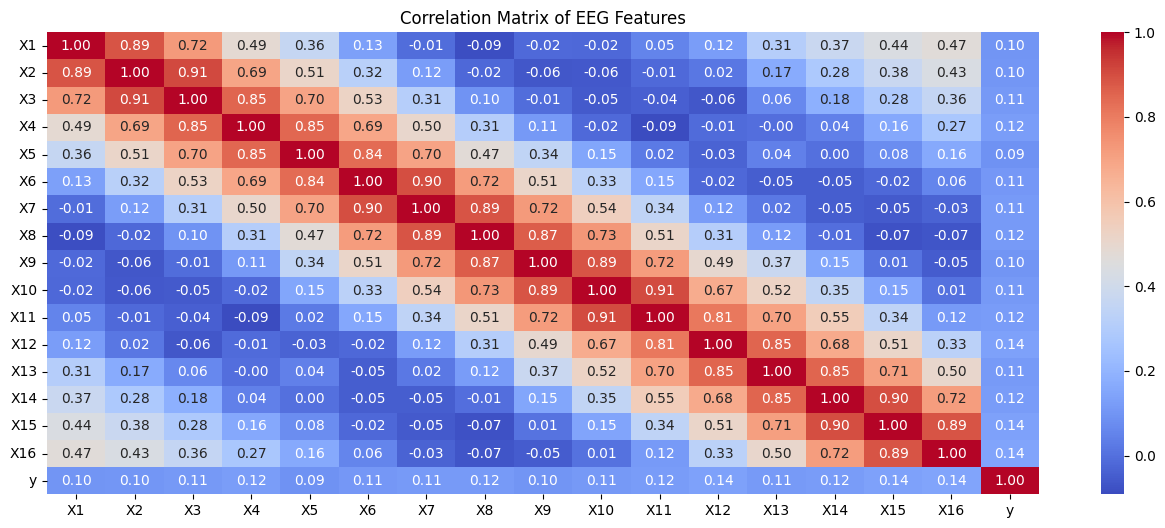

In [74]:
plt.figure(figsize=(16,6))
plt.title('Correlation Matrix of EEG Features')
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Inference
1. The correlation for features (X1-X16) vs target class (y) varies less from 0.09 to 0.14
2. It looks for features (X1-X16); they are highly correlated to their previous feature. Need to find the reason.
3. There is no strong linear relationship between any single feature and the target class(y). Hence, we can't just "draw a straight line" to separate a healthy patient (Class 0) from a seizure patient (Class 1, 2, or 3) using just one feature.
4. This shows the relationship between the featues (X1-X16) and the target class(y) is non linear.

In [77]:
X=dataset.drop('y', axis=1)
y=dataset['y']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [19]:
lr_pred = lr.predict(X_test)

In [83]:
svc_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test, svc_pred)

0.754375